In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

In [80]:
df = pd.read_csv(r'C:\Users\User\Desktop\gap year\internship -week 2\sales_data_cleaned.csv')

In [81]:
df

,order_id,customer_name,email,phone,product_category,order_date,revenue,discount
0,101,John Doe,john@email.com,9876543210,Electronics,2023-12-31,1200,10
1,105,David White,david@email.com,9123456789,Furniture,2024-02-15,2500,15
2,106,Emma Brown,emma@email.com,9234567890,Clothing,2024-08-03,700,5
3,107,Chris Green,no_email@email.com,9345678901,Furniture,2024-04-10,1800,25
4,103,Bob Miller,bob@email.com,0,Electronics,2024-12-01,3000,20
5,102,Alice Smith,alice@email.com,0,Clothing,2024-01-05,500,7
6,108,Alice Smith,alice@email.com,0,Clothing,2024-03-08,500,7


In [82]:
grouped_dist = df.groupby(['product_category'])['revenue'].sum().fillna(0)
grouped_dist['Electronics'].mean()

np.float64(4200.0)

In [83]:
grouped = df.groupby('product_category')
grouped

In [84]:
mean_revenue = grouped['discount'].mean()
mean_revenue

product_category
Clothing        6.333333
Electronics    15.000000
Furniture      20.000000
Name: discount, dtype: float64

In [85]:
df['order_date'] = pd.to_datetime(df['order_date'])
def get_month(date):
    m = date.month
    return m

df['Month'] = df['order_date'].apply(get_month)

In [86]:
df['MonthName'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])

In [87]:
df

,order_id,customer_name,email,phone,product_category,order_date,revenue,discount,Month,MonthName
0,101,John Doe,john@email.com,9876543210,Electronics,2023-12-31,1200,10,12,December
1,105,David White,david@email.com,9123456789,Furniture,2024-02-15,2500,15,2,February
2,106,Emma Brown,emma@email.com,9234567890,Clothing,2024-08-03,700,5,8,August
3,107,Chris Green,no_email@email.com,9345678901,Furniture,2024-04-10,1800,25,4,April
4,103,Bob Miller,bob@email.com,0,Electronics,2024-12-01,3000,20,12,December
5,102,Alice Smith,alice@email.com,0,Clothing,2024-01-05,500,7,1,January
6,108,Alice Smith,alice@email.com,0,Clothing,2024-03-08,500,7,3,March


In [88]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Set MonthName as ordered categorical
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)


C:\Users\User\AppData\Local\Temp\ipykernel_14428\1747162484.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='MonthName', columns='product_category', values='revenue', aggfunc='sum').fillna(0)


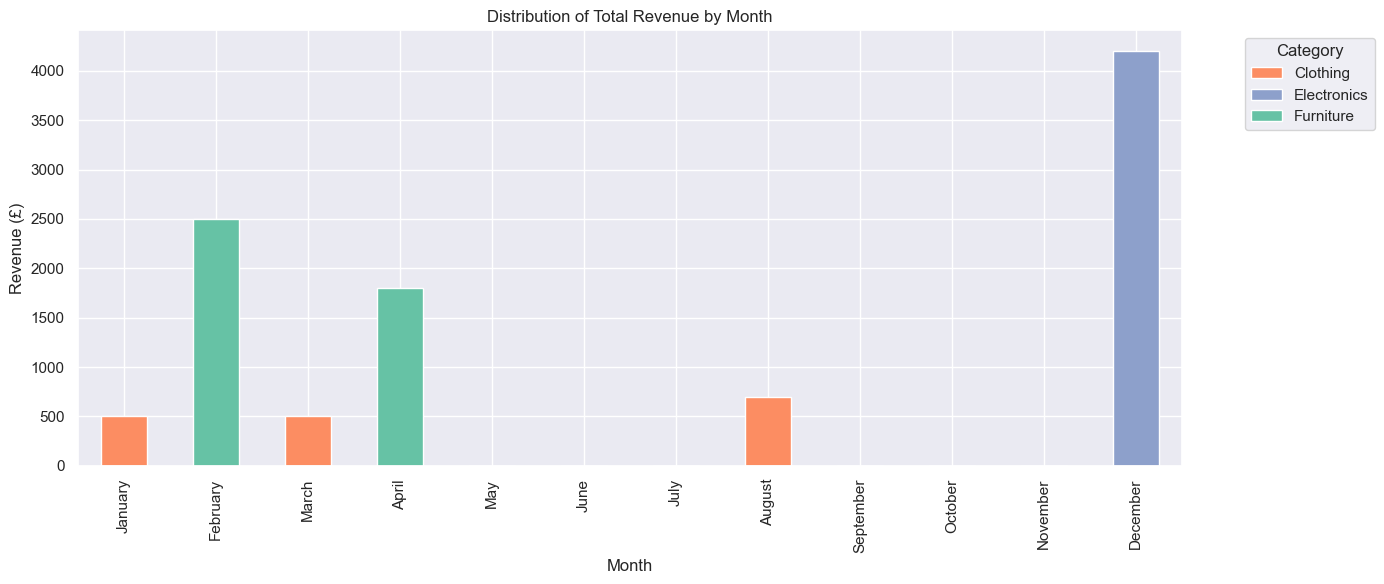

In [76]:

pivot_df = df.pivot_table(index='MonthName', columns='product_category', values='revenue', aggfunc='sum').fillna(0)
pivot_df = pivot_df.sort_index()
sns.set_theme()
fig, ax = plt.subplots(figsize=(14, 6))

colors = ['#fc8d62', '#8da0cb', '#66c2a5']  
categories = pivot_df.columns.tolist()


pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Distribution of Total Revenue by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (£)')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.savefig("Monthly-Distribution.png")
plt.show()

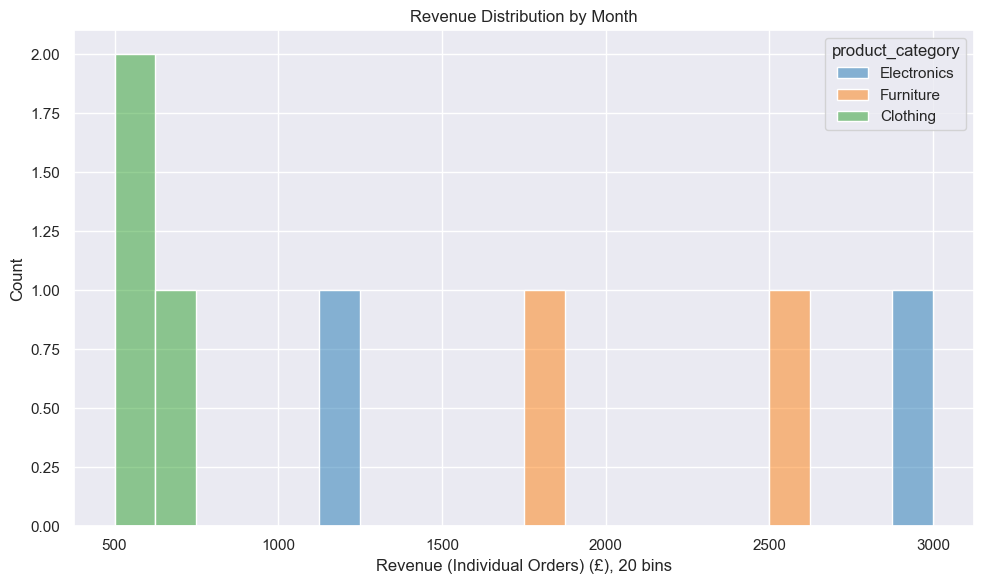

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_theme()

# Plot histogram with hue by MonthName
sns.histplot(data=df, x='revenue', hue='product_category', multiple='layer', palette='tab10', bins=20)

plt.title('Revenue Distribution by Month')
plt.xlabel('Revenue (Individual Orders) (£), 20 bins')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig("revenue_histogram_by_month.png")
plt.show()

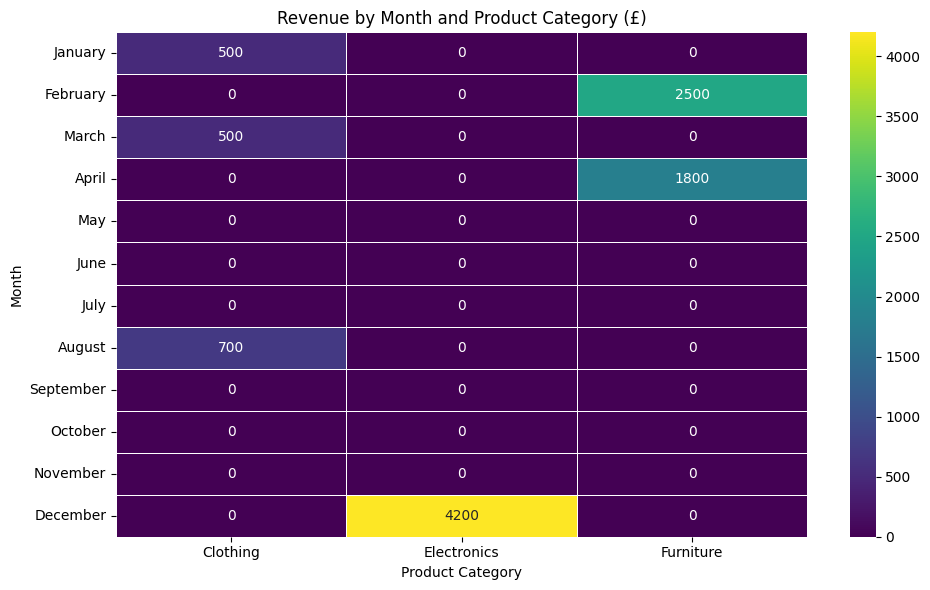

In [48]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='viridis', linewidths=0.5)

plt.title("Revenue by Month and Product Category (£)")
plt.xlabel("Product Category")
plt.ylabel("Month")

plt.tight_layout()
plt.savefig("Monthly-Heatmap.png")
plt.show()

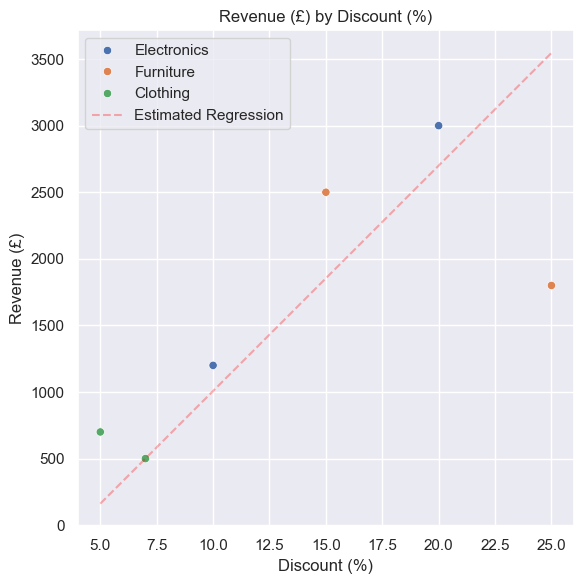

In [74]:
plt.figure(figsize=(6, 6))
sns.set_theme()
sns.scatterplot(data=df, x="discount", y="revenue", hue="product_category")

x_vals = np.linspace(df["discount"].min(), df["discount"].max(), 100)

y_vals = (1/0.00591) * x_vals - (3.9/0.0057)

# Plot the line
plt.plot(x_vals, y_vals, linestyle='--', color='red', label='Estimated Regression', alpha = 0.3)


plt.title("Revenue (£) by Discount (%)")
plt.xlabel("Discount (%)")
plt.ylabel("Revenue (£)")
plt.legend()

plt.tight_layout()
plt.savefig("rev-discount.png")
plt.show()